## Import Libraries

In [1]:
import pandas as pd
import nltk as lp
import streamlit as st
import seaborn as sns
import string
import re

## Data processing

### Load in data

In [57]:
df = pd.read_csv("expenses.csv", sep=',', parse_dates=['date'], names=['date','account_name','from_acc_num','to_acc_num','code','af_bij','amount_(eur)','type','description'], header=0)
df.head()

,date,account_name,from_acc_num,to_acc_num,code,af_bij,amount_(eur),type,description
0,2022-10-06,CBR via ING,NL58INGB0658210033,NL92INGB0005302809,ID,Af,"42,50",iDEAL,Naam: CBR via ING Omschrijving: 4595739362 005...
1,2022-10-06,Hr ZY Lian,NL58INGB0658210033,NaN,GT,Bij,"100,00",Online bankieren,Van Oranje spaarrekening Z54728857 Valutadatum...
2,2022-10-06,Sports Supplements Ltd,NL58INGB0658210033,NL04ADYB2017400157,ID,Af,"48,53",iDEAL,Naam: Sports Supplements Ltd Omschrijving: R8K...
3,2022-10-06,Mw E Guerrero Mavrou,NL58INGB0658210033,NL40INGB0657361607,GT,Af,"18,00",Online bankieren,Naam: Mw E Guerrero Mavrou Omschrijving: Stora...
4,2022-10-06,Jumbo Overwinningspl GRONINGEN,NL58INGB0658210033,NaN,BA,Af,"45,67",Betaalautomaat,Pasvolgnr: 900 05-10-2022 18:41 Transactie: W7...


### Convert EUR (str) into float datatype (only need to do it once)

In [58]:
df['amount_(eur)'] = [float(i.replace(',','.')) for i in df['amount_(eur)']]

In [59]:
df.loc[4,'description']

'Pasvolgnr: 900 05-10-2022 18:41 Transactie: W7R507 Term: 4N9D2Y Valutadatum: 06-10-2022'

#### Fill NA values

In [60]:
df = df.fillna(0)

#### Filtering for simple overview of all payments made for tuition

In [61]:
df_tuition = df[(df['af_bij'] == 'Af') 
                & (df['amount_(eur)'] >= 2000) 
                & (df['account_name'] != 'Hr ZY Lian')][['date','account_name', 'amount_(eur)']]

df_tuition

,date,account_name,amount_(eur)
434,2022-05-27,RIJKSUNIVERSITEIT GRON,3343.2
628,2022-03-28,RIJKSUNIVERSITEIT GRON,3343.2
872,2022-01-26,RIJKSUNIVERSITEIT GRON,3343.2
1096,2021-11-26,RIJKSUNIVERSITEIT GRON,3343.2
1335,2021-09-27,RIJKSUNIVERSITEIT GRON,3367.2
1702,2021-05-26,RIJKSUNIVERSITEIT GRON,3500.0
1839,2021-03-26,RIJKSUNIVERSITEIT GRON,3500.0
1925,2021-01-26,RIJKSUNIVERSITEIT GRON,3500.0
2069,2020-11-26,RIJKSUNIVERSITEIT GRON,3500.0
2208,2020-09-28,RIJKSUNIVERSITEIT GRON,3524.0


##### Lineplot

<AxesSubplot:xlabel='date'>

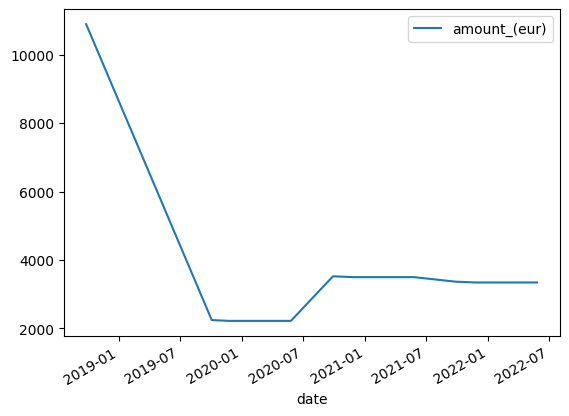

In [62]:
df_tuition.plot(x='date', y='amount_(eur)', kind='line')

##### Boxplot

amount_(eur)    AxesSubplot(0.125,0.53;0.352273x0.35)
dtype: object

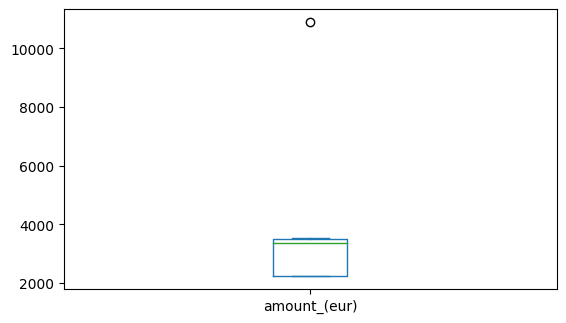

In [63]:
df_tuition['amount_(eur)'].plot(kind='box', vert=True, subplots=True, layout=(2,2), figsize=(14,8))

##### Density plot

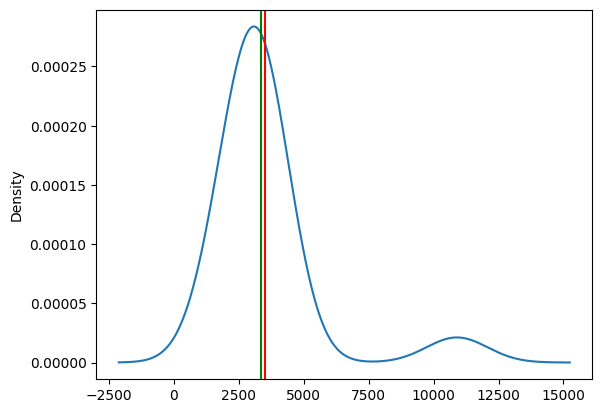

In [64]:
ax = df_tuition['amount_(eur)'].plot(kind='density')
ax.axvline(df_tuition['amount_(eur)'].mean(), color='red')
ax.axvline(df_tuition['amount_(eur)'].median(), color='green')

##### Histogram

<AxesSubplot:ylabel='Frequency'>

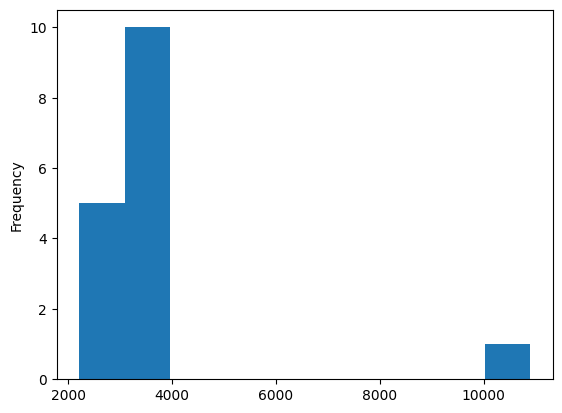

In [65]:
df_tuition['amount_(eur)'].plot(kind='hist')

##### Total Income

In [66]:
total_income = df[(df['af_bij'] == "Bij") & ((df['account_name'].str.contains("RIJK", case=False)) | (df['account_name'].str.contains("UBER", case=False)) | (df['account_name'].str.contains("EUROFINS", case=False)))]
total_income

,date,account_name,from_acc_num,to_acc_num,code,af_bij,amount_(eur),type,description
138,2022-08-29,EUROFINS GSC TRANS OPER.EXCE,NL58INGB0658210033,BE38001892807072,OV,Bij,62.40,Overschrijving,Naam: EUROFINS GSC TRANS OPER.EXCE Omschrijv...
242,2022-07-27,EUROFINS GSC TRANS OPER.EXCE,NL58INGB0658210033,BE38001892807072,OV,Bij,1113.00,Overschrijving,Naam: EUROFINS GSC TRANS OPER.EXCE Omschrijv...
325,2022-06-28,EUROFINS GSC TRANS OPER.EXCE,NL58INGB0658210033,BE38001892807072,OV,Bij,1197.20,Overschrijving,Naam: EUROFINS GSC TRANS OPER.EXCE Omschrijv...
352,2022-06-24,RIJKSUNIVERSITEIT GRON,NL58INGB0658210033,NL80ABNA0446049352,OV,Bij,233.35,Overschrijving,Naam: RIJKSUNIVERSITEIT GRON Omschrijving: Sal...
425,2022-05-30,Eurofins GSC Transformation + Operational Exce...,NL58INGB0658210033,BE38001892807072,OV,Bij,58.88,Overschrijving,Naam: Eurofins GSC Transformation + Operationa...
439,2022-05-26,EUROFINS GSC TRANS OPER.EXCE,NL58INGB0658210033,BE38001892807072,OV,Bij,1125.45,Overschrijving,Naam: EUROFINS GSC TRANS OPER.EXCE Omschrijv...
446,2022-05-25,RIJKSUNIVERSITEIT GRON,NL58INGB0658210033,NL80ABNA0446049352,OV,Bij,203.80,Overschrijving,Naam: RIJKSUNIVERSITEIT GRON Omschrijving: Sal...
517,2022-04-27,EUROFINS GSC TRANS OPER.EXCE,NL58INGB0658210033,BE38001892807072,OV,Bij,1210.73,Overschrijving,Naam: EUROFINS GSC TRANS OPER.EXCE Omschrijv...
523,2022-04-25,RIJKSUNIVERSITEIT GRON,NL58INGB0658210033,NL80ABNA0446049352,OV,Bij,162.57,Overschrijving,Naam: RIJKSUNIVERSITEIT GRON Omschrijving: Sal...
618,2022-03-29,EUROFINS GSC TRANS OPER.EXCE,NL58INGB0658210033,BE38001892807072,OV,Bij,1188.91,Overschrijving,Naam: EUROFINS GSC TRANS OPER.EXCE Omschrijv...


In [67]:
total_income['amount_(eur)'].sum()

18833.71

In [68]:
eurofins_income = total_income[(total_income['account_name'].str.contains('EUROFINS', case=False))]
university_income = total_income[(total_income['account_name'].str.contains('RIJK', case=False))]
uber_income = total_income[(total_income['account_name'].str.contains('UBER', case=False)) & ~(total_income['description'].str.contains('refund', case=False))]

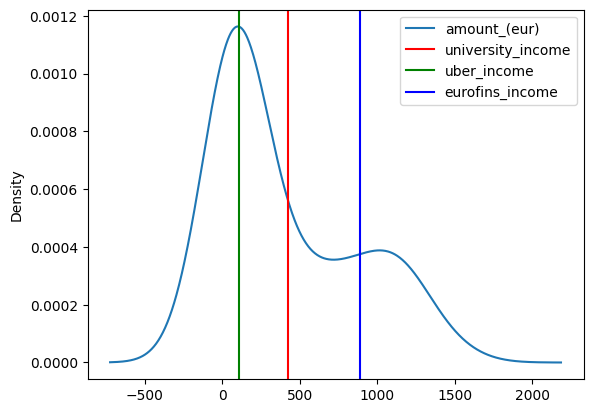

In [69]:
ax1 = total_income['amount_(eur)'].plot(kind='density')
ax1.axvline(university_income['amount_(eur)'].mean(), color='red', label='university_income')
ax1.axvline(uber_income['amount_(eur)'].mean(), color='green', label='uber_income')
ax1.axvline(eurofins_income['amount_(eur)'].mean(), color='blue', label='eurofins_income')
ax1.legend()

### General DataFrame info

In [17]:
df.shape

(5958, 9)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          5958 non-null   datetime64[ns]
 1   account_name  5958 non-null   object        
 2   from_acc_num  5958 non-null   object        
 3   to_acc_num    5958 non-null   object        
 4   code          5958 non-null   object        
 5   af_bij        5958 non-null   object        
 6   amount_(eur)  5958 non-null   float64       
 7   type          5958 non-null   object        
 8   description   5958 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 419.0+ KB


In [19]:
df.describe()

,amount_(eur)
count,5958.000000
mean,102.539260
std,412.786305
min,0.010000
25%,5.000000
50%,13.245000
75%,43.362500
max,10900.000000


In [20]:
df.loc[:,['to_acc_num']].value_counts()

to_acc_num            
0                         3703
NL50INGB0654704694         253
NL31INGB0654704066         211
NL55INGB0001979576         107
DE88500700100175526303      95
                          ... 
NL71RABO0158354575           1
NL72INGB0001082796           1
NL73RABO0325301433           1
NL74ABNA0616651023           1
NL98RABO0116746424           1
Length: 196, dtype: int64

In [21]:
df[df['to_acc_num'] == 'NL55INGB0001979576']

,date,account_name,from_acc_num,to_acc_num,code,af_bij,amount_(eur),type,description
18,2022-09-29,Kakarot Kak,NL58INGB0658210033,NL55INGB0001979576,GT,Af,779.69,Online bankieren,Naam: Kakarot Kak Omschrijving: Rent - October...
53,2022-09-13,Hr KV Kak,NL58INGB0658210033,NL55INGB0001979576,GT,Bij,60.00,Online bankieren,Naam: Hr KV Kak IBAN: NL55INGB0001979576 Datum...
57,2022-09-12,Kakarot Kak,NL58INGB0658210033,NL55INGB0001979576,GT,Af,137.25,Online bankieren,Naam: Kakarot Kak IBAN: NL55INGB0001979576 Dat...
84,2022-09-06,Hr KV Kak,NL58INGB0658210033,NL55INGB0001979576,GT,Bij,180.00,Online bankieren,Naam: Hr KV Kak Omschrijving: AMD Ryzen 5 5600...
93,2022-09-05,Hr KV Kak,NL58INGB0658210033,NL55INGB0001979576,GT,Bij,12.00,Online bankieren,Naam: Hr KV Kak Omschrijving: Asian Sauce IBAN...
...,...,...,...,...,...,...,...,...,...
5221,2018-06-04,Hr KV Kak,NL58INGB0658210033,NL55INGB0001979576,GT,Af,2.00,Online bankieren,Naam: Hr KV Kak Omschrijving: Yeet IBAN: NL55I...
5328,2018-05-08,Hr KV Kak,NL58INGB0658210033,NL55INGB0001979576,GT,Bij,5.00,Online bankieren,Naam: Hr KV Kak IBAN: NL55INGB0001979576 Valut...
5470,2018-03-26,Hr KV Kak,NL58INGB0658210033,NL55INGB0001979576,GT,Bij,8.00,Online bankieren,Naam: Hr KV Kak IBAN: NL55INGB0001979576 Valut...
5565,2018-03-01,Kuss,NL58INGB0658210033,NL55INGB0001979576,GT,Af,32.50,Online bankieren,Naam: Kuss Omschrijving: La Cubanita IBAN: NL5...


In [22]:
df[(df['description'].str.contains('rent', case=False)) & (df['to_acc_num'] != 0)][['account_name','to_acc_num','description']]


,account_name,to_acc_num,description
18,Kakarot Kak,NL55INGB0001979576,Naam: Kakarot Kak Omschrijving: Rent - October...
115,Bo-Mat BV (Bo-Rent),NL25INGB0662596579,Naam: Bo-Mat BV (Bo-Rent) Omschrijving: 471214...
129,Kakarot Kak,NL55INGB0001979576,Naam: Kakarot Kak Omschrijving: Rent - Septemb...
146,Massimiliano Donadon,NL50INGB0654704694,Naam: Massimiliano Donadon Omschrijving: Bo-Re...
220,Kakarot Kak,NL55INGB0001979576,Naam: Kakarot Kak Omschrijving: Rent - August ...
246,Dao Nguyen,BE46063422522436,Naam: Dao Nguyen Omschrijving: Monthly Rent IB...
275,Kakarot Kak,NL55INGB0001979576,Naam: Kakarot Kak Omschrijving: Rent July + de...
344,Dao Nguyen,BE46063422522436,Naam: Dao Nguyen Omschrijving: Monthly Rent IB...
440,Dao Nguyen,BE46063422522436,Naam: Dao Nguyen Omschrijving: Monthly Rent IB...
443,Dao Nguyen,BE46063422522436,Naam: Dao Nguyen Omschrijving: Rent - June IBA...


In [23]:
df['account_name'].unique()[:20]

array(['CBR via ING', 'Hr ZY Lian', 'Sports Supplements Ltd',
       'Mw E Guerrero Mavrou', 'Jumbo Overwinningspl GRONINGEN',
       'ALBERT HEIJN 2219 GRONINGEN NLD',
       'PayPal (Europe) S.a r.l. et Cie, S.C.A.',
       'NS Internationaal B.V. by Buckaroo Stichting Derdengelden',
       '123Inkt', 'Stach Forum GRONINGEN NLD',
       'Moneylogistics ERMELO NLD', 'Kakarot Kak', 'TELE2', 'Worldpay',
       'Visa Payments Limited', 'Amazing Oriental GRONINGEN NLD',
       'Sportcentrum RUG HG GRONINGEN', 'Flixbus Berlin DEU',
       'STICHTING DERDENGELDEN BUCKAROO',
       'McDonalds Westerhaven GRONINGEN'], dtype=object)

In [24]:
df['description'].unique()[500:510]

array(['Van Oranje spaarrekening B54730084 Valutadatum: 30-04-2022',
       'Pasvolgnr: 900 29-04-2022 08:49 Transactie: K6S4O4 Term: 61492300 Valutadatum: 30-04-2022',
       'Naam: Mw E Guerrero Mavrou Omschrijving: Storage Shurgard IBAN: NL40INGB0657361607 Valutadatum: 30-04-2022',
       'Naam: RiotGames via Smart2Pay Omschrijving: 1012802399 1040000006261265 iDEAL Payment IBAN: FR7610107002280035091374489 Kenmerk: 30-04-2022 04:40 1040000006261265 Valutadatum: 30-04-2022',
       'Pasvolgnr: 900 28-04-2022 20:43 Transactie: K2F7E1 Term: 54163238 Valutadatum: 29-04-2022',
       'Naam: TELE2 Omschrijving: Klant 1.19605220 Factuur 901453689266 IBAN: NL84COBA0733959520 Kenmerk: 500323522619 Machtiging ID: 1.19605220 Incassant ID: NL12T2N333034180000 Doorlopende incasso Valutadatum: 29-04-2022',
       'Pasvolgnr: 900 27-04-2022 12:30 Transactie: C2Q794 Term: 01044855 Valutadatum: 28-04-2022',
       'Pasvolgnr: 900 27-04-2022 19:02 Transactie: E977U1 Term: 01941199 Valutadatum: 28-04

### Define categories

In [25]:
categories = ['entertainment','food','gifts_donation','housing','income','insurance','legal','loans','personal','savings_investments','subscriptions','taxes','transportation']
sub_categories = [['video/dvd','games','movies','concerts','sporting_events','live_theater','other'],
                  ['groceries','dine_out','other'],
                  ['birthday'],
                  ['mortgage_rent','phone','energy','water','gas','cable','waste_removal','maintenance_repairs','supplies','other'],
                  ['investments','salary','stocks','allowance','commission','interest','government_payments','gifts','payback'],
                  ['home','health','life','other'],
                  ['attorney','alimony','other'],
                  ['personal','credit_card','student','housing','other'],
                  ['medical','personal_care','clothing','tech','music','sports','other'],
                  ['retirement','investment','bank'],
                  ['phone','entertainment','fitness','learning','other'],
                  ['federal','state','local','income','other'],
                  ['vehicle_payment','public_transport','licensing','fuel','maintenance','other']]

#### Combine lists into dictionary

In [26]:
categories_dict = {categories[i]: sub_categories[i] for i in range(len(categories))}
categories_dict

{'entertainment': ['video/dvd',
  'games',
  'movies',
  'concerts',
  'sporting_events',
  'live_theater',
  'other'],
 'food': ['groceries', 'dine_out', 'other'],
 'gifts_donation': ['birthday'],
 'housing': ['mortgage_rent',
  'phone',
  'energy',
  'water',
  'gas',
  'cable',
  'waste_removal',
  'maintenance_repairs',
  'supplies',
  'other'],
 'income': ['investments',
  'salary',
  'stocks',
  'allowance',
  'commission',
  'interest',
  'government_payments',
  'gifts',
  'payback'],
 'insurance': ['home', 'health', 'life', 'other'],
 'legal': ['attorney', 'alimony', 'other'],
 'loans': ['personal', 'credit_card', 'student', 'housing', 'other'],
 'personal': ['medical',
  'personal_care',
  'clothing',
  'tech',
  'music',
  'sports',
  'other'],
 'savings_investments': ['retirement', 'investment', 'bank'],
 'subscriptions': ['phone', 'entertainment', 'fitness', 'learning', 'other'],
 'taxes': ['federal', 'state', 'local', 'income', 'other'],
 'transportation': ['vehicle_payme

### Convert text to numbers

#### Text preprocessing

##### Define columns with texts as object_columns

In [27]:
object_columns = df.loc[:,df.dtypes == 'object'].columns

for i, value in enumerate(object_columns):
    df[value] = df[value].astype(dtype='str')


##### Remove acc numbers columns

In [28]:
object_columns = object_columns.drop(['from_acc_num','to_acc_num'])

##### Convert all strings to lowercase, remove all punctuations, remove words combined with digits

In [29]:
for i, value in enumerate(object_columns):
    df[value] = df[value].str.lower() ## converts all strings to lowercase
    df[value] = df[value].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x)) ## removes all punctuation from text
    df[value] = df[value].apply(lambda x: re.sub('\w*\d\w*', '', x)) # removes words with digits like m34f1f31 from each row

In [30]:
df

,date,account_name,from_acc_num,to_acc_num,code,af_bij,amount_(eur),type,description
0,2022-10-06,cbr via ing,NL58INGB0658210033,NL92INGB0005302809,id,af,42.50,ideal,naam cbr via ing omschrijving betalen mijn c...
1,2022-10-06,hr zy lian,NL58INGB0658210033,0,gt,bij,100.00,online bankieren,van oranje spaarrekening valutadatum
2,2022-10-06,sports supplements ltd,NL58INGB0658210033,NL04ADYB2017400157,id,af,48.53,ideal,naam sports supplements ltd omschrijving ib...
3,2022-10-06,mw e guerrero mavrou,NL58INGB0658210033,NL40INGB0657361607,gt,af,18.00,online bankieren,naam mw e guerrero mavrou omschrijving storage...
4,2022-10-06,jumbo overwinningspl groningen,NL58INGB0658210033,0,ba,af,45.67,betaalautomaat,pasvolgnr transactie term valutadatum
...,...,...,...,...,...,...,...,...,...
5953,2017-10-02,abnamro groningen nld,NL58INGB0658210033,0,gm,af,20.00,geldautomaat,pasvolgnr transactie term valutadatum
5954,2017-10-02,kantine scheikunde groningen nld,NL58INGB0658210033,0,ba,af,1.80,betaalautomaat,pasvolgnr transactie term valutadatum
5955,2017-10-02,kantine scheikunde groningen nld,NL58INGB0658210033,0,ba,af,1.30,betaalautomaat,pasvolgnr transactie term valutadatum
5956,2017-10-02,globalcollect,NL58INGB0658210033,NL14RABO0155503219,id,af,8.68,ideal,naam globalcollect omschrijving iban kenm...


##### Import NLTK functions for next steps

In [31]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

##### Tokenization of words

In [32]:
for i, value in enumerate(object_columns):
    df[f'{value}_tokens'] = df[value].apply(lambda x: word_tokenize(x)) ## converts all strings to lowercase and store as new column

In [33]:
df.loc[:,'account_name_tokens':]

,account_name_tokens,code_tokens,af_bij_tokens,type_tokens,description_tokens
0,"[cbr, via, ing]",[id],[af],[ideal],"[naam, cbr, via, ing, omschrijving, betalen, m..."
1,"[hr, zy, lian]",[gt],[bij],"[online, bankieren]","[van, oranje, spaarrekening, valutadatum]"
2,"[sports, supplements, ltd]",[id],[af],[ideal],"[naam, sports, supplements, ltd, omschrijving,..."
3,"[mw, e, guerrero, mavrou]",[gt],[af],"[online, bankieren]","[naam, mw, e, guerrero, mavrou, omschrijving, ..."
4,"[jumbo, overwinningspl, groningen]",[ba],[af],[betaalautomaat],"[pasvolgnr, transactie, term, valutadatum]"
...,...,...,...,...,...
5953,"[abnamro, groningen, nld]",[gm],[af],[geldautomaat],"[pasvolgnr, transactie, term, valutadatum]"
5954,"[kantine, scheikunde, groningen, nld]",[ba],[af],[betaalautomaat],"[pasvolgnr, transactie, term, valutadatum]"
5955,"[kantine, scheikunde, groningen, nld]",[ba],[af],[betaalautomaat],"[pasvolgnr, transactie, term, valutadatum]"
5956,[globalcollect],[id],[af],[ideal],"[naam, globalcollect, omschrijving, iban, kenm..."


##### Stopword removal

In [34]:
english_stopwords = stopwords.words('english')
dutch_stopwords = stopwords.words('dutch')

In [35]:
for i,columns in enumerate(object_columns):
    for j,rows in enumerate(df.index):
        df.replace(df[columns][rows],[word for word in df[columns][rows] if word not in english_stopwords or word not in dutch_stopwords])

TypeError: Invalid "to_replace" type: 'str'

In [36]:
df.loc[:,'account_name_tokens':]

,account_name_tokens,code_tokens,af_bij_tokens,type_tokens,description_tokens
0,"[cbr, via, ing]",[id],[af],[ideal],"[naam, cbr, via, ing, omschrijving, betalen, m..."
1,"[hr, zy, lian]",[gt],[bij],"[online, bankieren]","[van, oranje, spaarrekening, valutadatum]"
2,"[sports, supplements, ltd]",[id],[af],[ideal],"[naam, sports, supplements, ltd, omschrijving,..."
3,"[mw, e, guerrero, mavrou]",[gt],[af],"[online, bankieren]","[naam, mw, e, guerrero, mavrou, omschrijving, ..."
4,"[jumbo, overwinningspl, groningen]",[ba],[af],[betaalautomaat],"[pasvolgnr, transactie, term, valutadatum]"
...,...,...,...,...,...
5953,"[abnamro, groningen, nld]",[gm],[af],[geldautomaat],"[pasvolgnr, transactie, term, valutadatum]"
5954,"[kantine, scheikunde, groningen, nld]",[ba],[af],[betaalautomaat],"[pasvolgnr, transactie, term, valutadatum]"
5955,"[kantine, scheikunde, groningen, nld]",[ba],[af],[betaalautomaat],"[pasvolgnr, transactie, term, valutadatum]"
5956,[globalcollect],[id],[af],[ideal],"[naam, globalcollect, omschrijving, iban, kenm..."


##### Stemming and Lemmatization

##### Part of Speech Tagging

##### Information Retrieval